In [3]:
import sys
import os

path = os.path.abspath('../build/lib')

if path not in sys.path:
    sys.path.append(path)

In [4]:
import body as bd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from body import twobody as twb
from astropy import units as u
from astropy import constants as const
%matplotlib inline

ModuleNotFoundError: No module named 'body'

In [ ]:
bd.Body.setG(const.G.value)

In [ ]:
# initial conditions for a circular orbit
m1 = 1e21
m2 = 1e21

d = (100 * 100 * const.G.value * (m1 + m2) / (4 * np.pi * np.pi)) ** (1/3) # time period = 100 seconds

v1 = np.sqrt(const.G.value * m2 / d) # velocity w.r.t c.o.m
v2 = -np.sqrt(const.G.value * m1 / d) # velocity w.r.t c.o.m

v_com = np.abs(v1) / 5

body0 = bd.Body(m1, bd.phyvec(0.0, 0.0, 0.0), bd.phyvec(0.0, v1 + v_com, 0.0))
body1 = bd.Body(m2, bd.phyvec(d, 0.0, 0.0), bd.phyvec(0.0, v2 + v_com, 0.0)) 

system = twb.Twobody(body0, body1)

# forward euler method
system.evolve_fwdeuler(100, 0.01, True)

print(v1)
print(v2)
print(d)

1436.6694761505828
-1436.6694761505828
32336.42425758127


In [ ]:
'''
There is an issue that interferes whenever get_states() that provides access 
to the private attribute state (vector<vector<double>>) of the class Body's 
instance is called on system[0] or system[1]. The below is a workaround, though 
one that defeats one of the primary purposes of using pybind11. 
'''
system.states_to_csv('outputs/body0_run_0.csv', 0)
system.states_to_csv('outputs/body1_run_0.csv', 1)

body0_df = pd.read_csv('outputs/body0_run_0.csv', header=None)
body1_df = pd.read_csv('outputs/body1_run_0.csv', header=None)


In [ ]:
''' 
This cell is meant for checking whether 
the issue highlighted in the previous cell is fixed
'''
# commented so that kernel does not crash!
# system[1].get_states()


TypeError: cannot create weak reference to 'list' object

: 

: 

In [ ]:
display(df)

,0,1,2,3,4,5,6,7
0,-1.0,1.000000e+21,2281.893984,20459.17751,0.0,-736.580776,1521.192371,0.0


In [ ]:
display(body0_df)

,0,1,2,3,4,5,6,7
0,-1.00,1.000000e+21,0.000000,0.0000,0,0.00000,1724.000,0
1,0.00,1.000000e+21,0.012766,17.2400,0,1.27659,1724.000,0
2,0.01,1.000000e+21,0.038298,34.4801,0,2.55318,1724.000,0
3,0.02,1.000000e+21,0.076595,51.7201,0,3.82977,1724.000,0
4,0.03,1.000000e+21,0.127659,68.9600,0,5.10636,1724.000,0
...,...,...,...,...,...,...,...,...
9996,99.95,1.000000e+21,30025.000000,37045.4000,0,740.96400,-943.900,0
9997,99.96,1.000000e+21,30032.400000,37036.0000,0,739.86900,-944.557,0
9998,99.97,1.000000e+21,30039.800000,37026.5000,0,738.77300,-945.214,0
9999,99.98,1.000000e+21,30047.200000,37017.1000,0,737.67700,-945.870,0


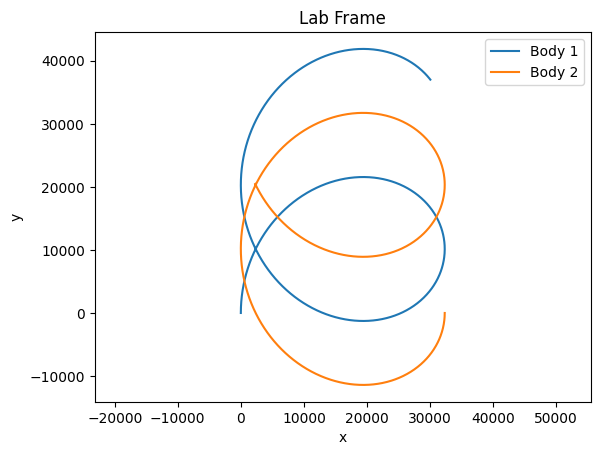

In [ ]:
def plot_system_lab_frame():
    global body0_x, body0_y, body1_x, body1_y
    body0_x = body0_df.iloc[:, 2]
    body0_y = body0_df.iloc[:, 3]

    body1_x = body1_df.iloc[:, 2]
    body1_y = body1_df.iloc[:, 3]

    plt.axis('equal')

    plt.plot(body0_x, body0_y, label = 'Body 1')
    plt.plot(body1_x, body1_y, label = 'Body 2')

plot_system_lab_frame()
plt.title('Lab Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

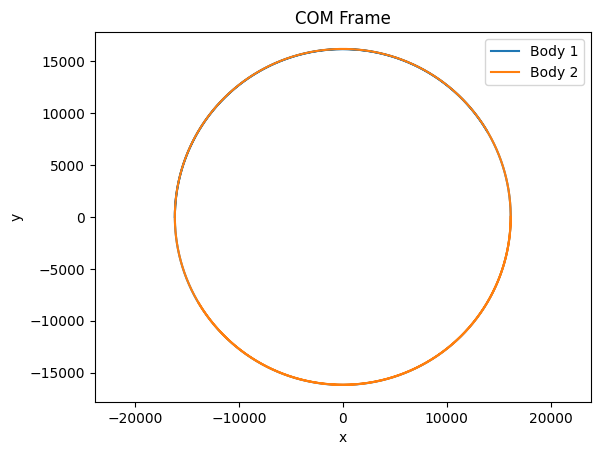

In [ ]:
def plot_system_com_frame():
    com_x = (system[0].get_mass() * body0_x + system[1].get_mass() * body1_x) / (system[0].get_mass() + system[1].get_mass())
    com_y = (system[0].get_mass() * body0_y + system[1].get_mass() * body1_y) / (system[0].get_mass() + system[1].get_mass())

    body0_com_x = body0_x - com_x
    body0_com_y = body0_y - com_y

    body1_com_x = body1_x - com_x
    body1_com_y = body1_y - com_y

    plt.axis('equal')
    plt.plot(body0_com_x, body0_com_y, label = 'Body 1')
    plt.plot(body1_com_x, body1_com_y, label = 'Body 2')
plot_system_com_frame()
plt.title('COM Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# euler-richardson method, circular orbit
print(body0.get_mass())
system.set_body(body0, 0).set_body(body1, 1)
# print(system[0].get_mass())

system.clear_states()
system.evolve_eulric(100, 0.01, True)

1e+21


mass: 0.000000000000000e+00
pos: [0.000000000000000e+00, 0.000000000000000e+00, 0.000000000000000e+00]
vel: [0.000000000000000e+00, 0.000000000000000e+00, 0.000000000000000e+00]

In [ ]:
'''
There is an issue that interferes whenever get_states() that provides access 
to the private attribute state (vector<vector<double>>) of the class Body's 
instance is called on system[0] or system[1]. The below is a workaround, though 
one that defeats one of the primary purposes of using pybind11. 
'''
system.states_to_csv('outputs/body0_run_1.csv', 0)
system.states_to_csv('outputs/body1_run_1.csv', 1)

body0_df = pd.read_csv('outputs/body0_run_1.csv', header=None)
body1_df = pd.read_csv('outputs/body1_run_1.csv', header=None)

In [ ]:
display(body0_df)

,0,1,2,3,4,5,6,7
0,-1.00,1.000000e+21,0.000000,0.0000,0,0.00000,1724.000,0
1,0.00,1.000000e+21,0.009574,17.2400,0,1.27659,1724.000,0
2,0.01,1.000000e+21,0.031915,34.4801,0,2.55318,1724.000,0
3,0.02,1.000000e+21,0.067021,51.7201,0,3.82977,1724.000,0
4,0.03,1.000000e+21,0.114893,68.9600,0,5.10636,1724.000,0
...,...,...,...,...,...,...,...,...
9996,99.95,1.000000e+21,30019.700000,37057.8000,0,741.38200,-943.456,0
9997,99.96,1.000000e+21,30027.100000,37048.3000,0,740.28800,-944.114,0
9998,99.97,1.000000e+21,30034.500000,37038.9000,0,739.19300,-944.772,0
9999,99.98,1.000000e+21,30041.900000,37029.4000,0,738.09800,-945.428,0


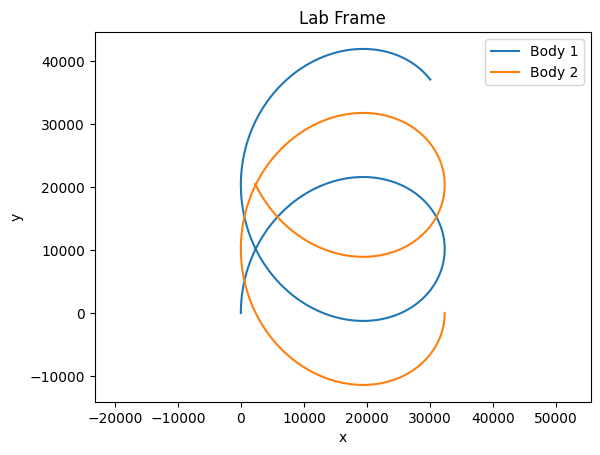

In [ ]:
plot_system_lab_frame()
plt.title('Lab Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

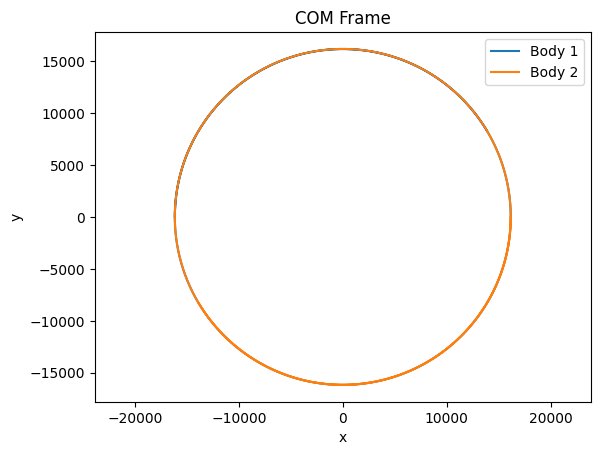

In [ ]:
plot_system_com_frame()
plt.title('COM Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# elliptical orbit

system.set_pos(bd.phyvec(0.0, 0.0, 0.0), 0).set_pos(bd.phyvec(d, 0.0, 0.0), 1)
system.set_vel(bd.phyvec(0.0, 0.5 * v1 + v_com, 0.0), 0).set_vel(bd.phyvec(0.0, -v1 + v_com, 0.0), 1)

system.clear_states()

system.evolve_fwdeuler(100, 0.01, True)
print(0.5 * v1 + v_com)
print(-v1 + v_com)

1005.668633305408
-1149.3355809204663


In [ ]:
'''
There is an issue that interferes whenever get_states() that provides access 
to the private attribute state (vector<vector<double>>) of the class Body's 
instance is called on system[0] or system[1]. The below is a workaround, though 
one that defeats one of the primary purposes of using pybind11. 
'''
system.states_to_csv('outputs/body0_run_2.csv', 0)
system.states_to_csv('outputs/body1_run_2.csv', 1)

body0_df = pd.read_csv('outputs/body0_run_2.csv', header=None)
body1_df = pd.read_csv('outputs/body1_run_2.csv', header=None)

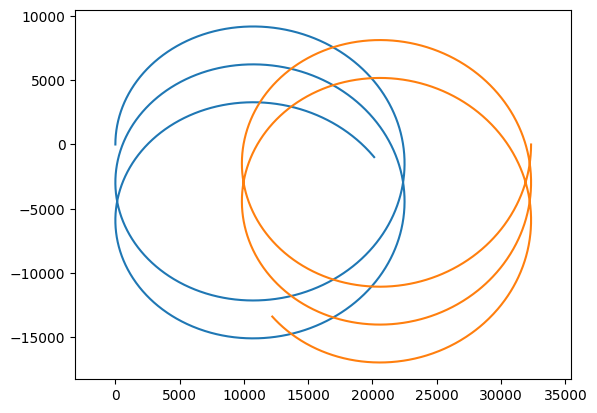

In [ ]:
plot_system_lab_frame()

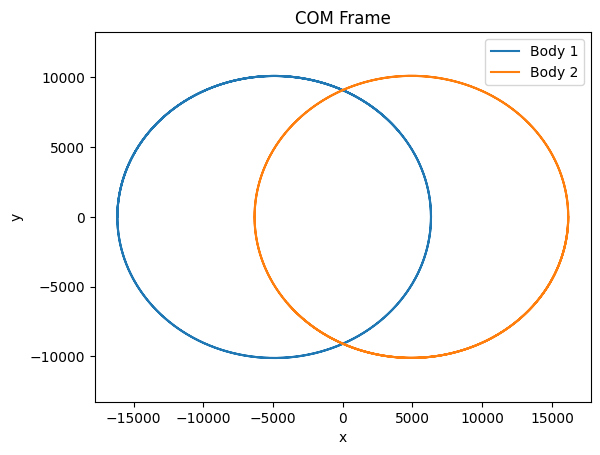

In [ ]:
plot_system_com_frame()
plt.title('COM Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# hyperbolic trajectory

system.set_pos(bd.phyvec(0.0, 0.0, 0.0), 0).set_pos(bd.phyvec(d, 0.0, 0.0), 1)
system.set_vel(bd.phyvec(0.0, 2 * v1 + v_com, 0.0), 0).set_vel(bd.phyvec(0.0, -v1 + v_com, 0.0), 1)

system.clear_states()

system.evolve_fwdeuler(100, 0.01, True)

print(2 * v1 + v_com)

3160.672847531282


In [ ]:
'''
There is an issue that interferes whenever get_states() that provides access 
to the private attribute state (vector<vector<double>>) of the class Body's 
instance is called on system[0] or system[1]. The below is a workaround, though 
one that defeats one of the primary purposes of using pybind11. 
'''
system.states_to_csv('outputs/body0_run_3.csv', 0)
system.states_to_csv('outputs/body1_run_3.csv', 1)

body0_df = pd.read_csv('outputs/body0_run_3.csv', header=None)
body1_df = pd.read_csv('outputs/body1_run_3.csv', header=None)

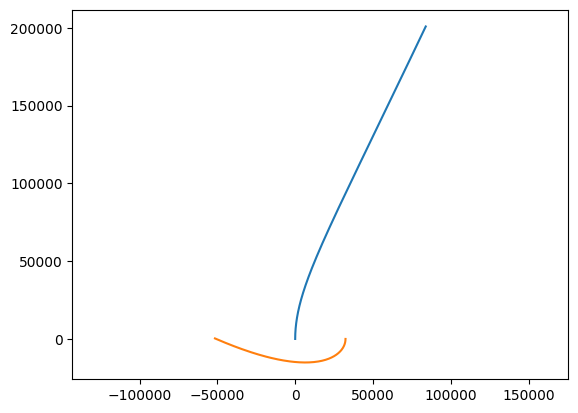

In [ ]:
plot_system_lab_frame()

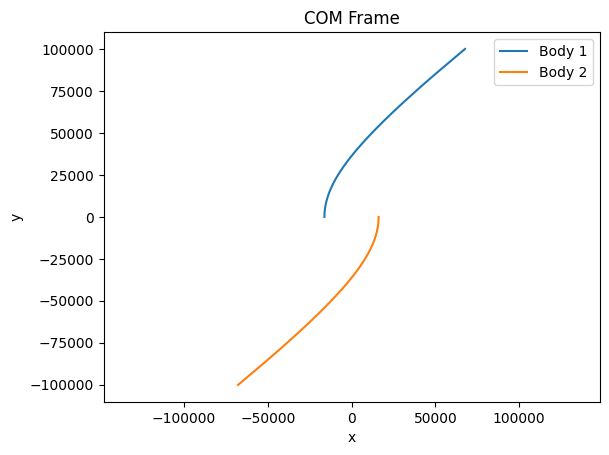

In [ ]:
plot_system_com_frame()
plt.title('COM Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
body0_df = pd.read_csv('../kirkwood_twobody_0.csv', header=None)
body1_df = pd.read_csv('../kirkwood_twobody_1.csv', header=None)

In [18]:
display(body0_df)
display(body1_df)

,0,1,2,3,4,5,6,7
0,-1.000000e+00,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,1,NaN,NaN,NaN,NaN,NaN,NaN
2,5.616000e+05,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1.123200e+06,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1.684800e+06,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2806,1.575290e+09,1,NaN,NaN,NaN,NaN,NaN,NaN
2807,1.575850e+09,1,NaN,NaN,NaN,NaN,NaN,NaN
2808,1.576410e+09,1,NaN,NaN,NaN,NaN,NaN,NaN
2809,1.576970e+09,1,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7
0,-1.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
2,5.616000e+05,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
3,1.123200e+06,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
4,1.684800e+06,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2806,1.575290e+09,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
2807,1.575850e+09,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
2808,1.576410e+09,0.000955,NaN,NaN,NaN,NaN,NaN,NaN
2809,1.576970e+09,0.000955,NaN,NaN,NaN,NaN,NaN,NaN


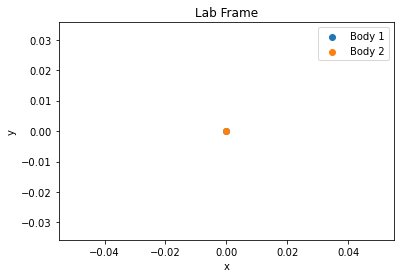

In [19]:
def plot_system_lab_frame():
    global body0_x, body0_y, body1_x, body1_y
    body0_x = body0_df.iloc[:, 2]
    body0_y = body0_df.iloc[:, 3]

    body1_x = body1_df.iloc[:, 2]
    body1_y = body1_df.iloc[:, 3]

    plt.axis('equal')

    plt.scatter(body0_x, body0_y, label = 'Body 1')
    plt.scatter(body1_x, body1_y, label = 'Body 2')

plot_system_lab_frame()
plt.title('Lab Frame')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()